In [16]:
## Tree
from sklearn.datasets import load_iris
from sklearn import tree

In [17]:
iris = load_iris()

In [18]:
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)

### Graphviz 설치
https://graphviz.org/download/#windows

In [4]:
## !pip install pydotplus
import pydotplus
from IPython.display import Image

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")

True

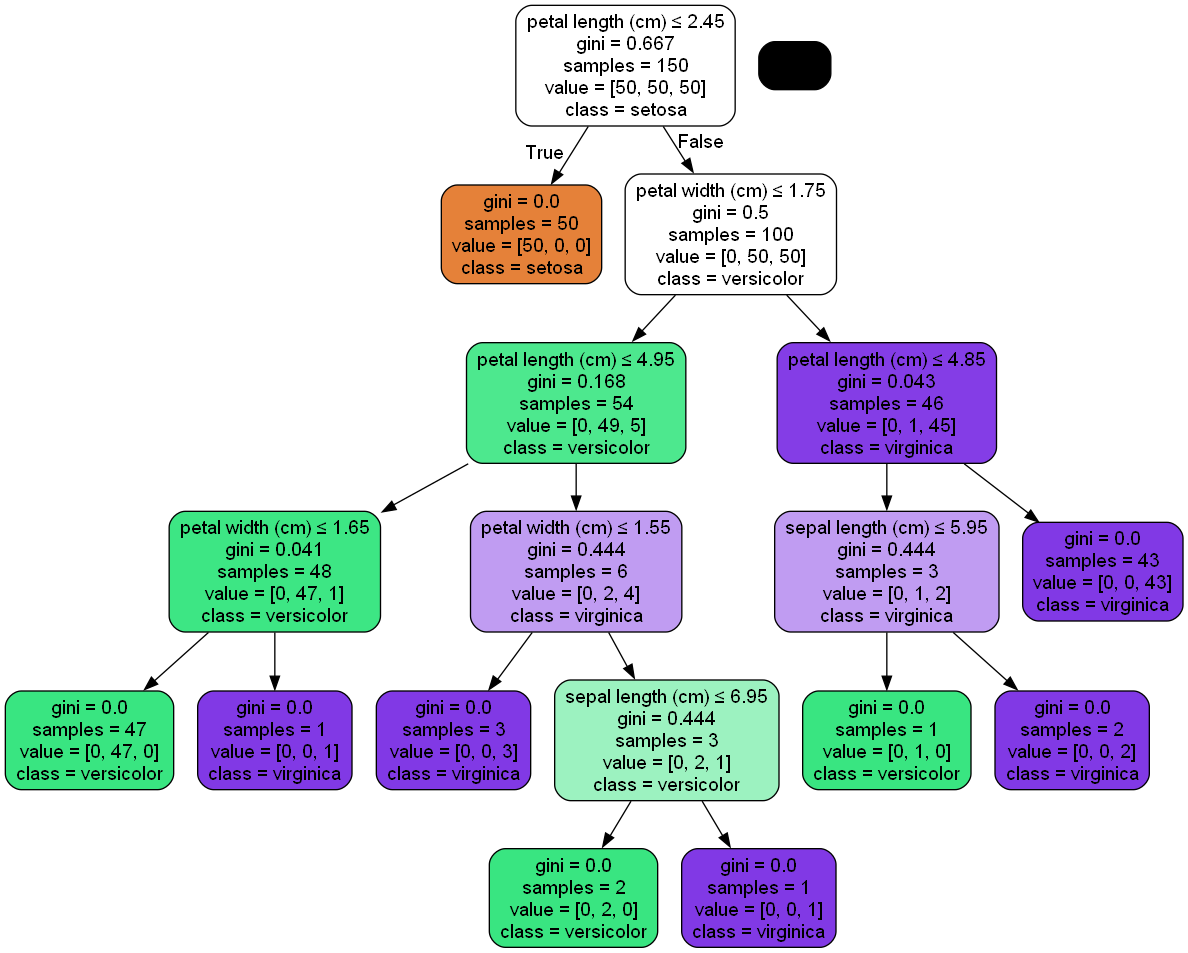

In [6]:
Image(graph.create_png())

## Ensemble (Bagging, Boosting, Random Forest) 

In [19]:
## !pip install graphviz
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
#from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris

In [20]:
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=100)

## Bagging Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

default : 10

In [21]:
m_bagging = BaggingClassifier()
m_bagging.fit(X_train,y_train)

BaggingClassifier()

In [22]:
pred_bagging = m_bagging.predict(X_test)

In [23]:
cf_bagging=confusion_matrix(y_test,pred_bagging)
print('Bagging Confusion Matrix')
print(cf_bagging)

Bagging Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [24]:
score_bagging=m_bagging.score(X_test, y_test)
print('Bagging Accuracy')
print(score_bagging)

Bagging Accuracy
0.9555555555555556


## Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

default : 100

In [25]:
m_boosting = GradientBoostingClassifier()
m_boosting.fit(X_train,y_train)

GradientBoostingClassifier()

In [26]:
pred_boosting = m_boosting.predict(X_test)
cf_boosting = confusion_matrix(y_test,pred_boosting)
print('Boosting Confusion Matrix')
print(cf_boosting)

Boosting Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [27]:
score_boosting = m_boosting.score(X_test, y_test)
print('Boosting Accuracy')
print(score_boosting)

Boosting Accuracy
0.9555555555555556


## Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#
- criterion = {“gini”, “entropy”, “log_loss”}, default=”gini”
- max_features= {“sqrt”, “log2”, None}, int or float, default=”sqrt”

default : 100

In [9]:
m_RF = RandomForestClassifier(n_estimators=1000)
m_RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [10]:
pred_RF = m_RF.predict(X_test)
cf_RF = confusion_matrix(y_test,pred_RF)
print('Random Forest Confusion Matrix')
print(cf_RF)

Random Forest Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [11]:
score_RF = m_RF.score(X_test, y_test)
print('Random Forest Accuracy')
print(score_RF)

Random Forest Accuracy
0.9555555555555556


In [12]:
importances = m_RF.feature_importances_
importances

array([0.09473912, 0.02887609, 0.42714776, 0.44923703])

In [13]:
std = np.std([m_RF.feature_importances_ for tree in m_RF.estimators_], axis=0) # 변동성이 얼마나 있는지

In [14]:
변수명 = [f"feature {i}" for i in range(iris.data.shape[1])]
변수명

['feature 0', 'feature 1', 'feature 2', 'feature 3']

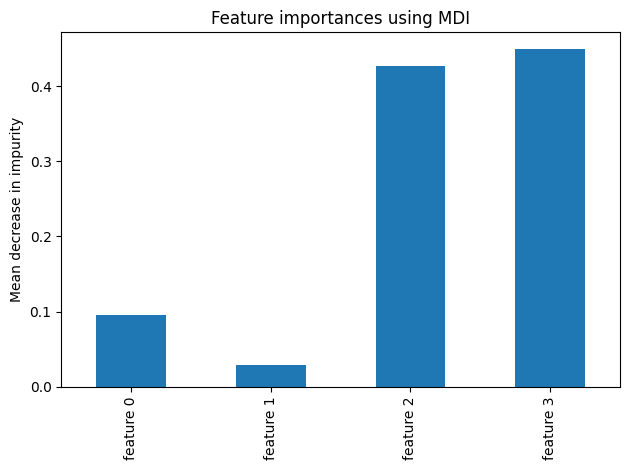

In [15]:
forest_importances = pd.Series(importances, index=변수명)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 보다 다양한 그림은
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#examples-using-sklearn-ensemble-randomforestclassifier
